## Summary: Using the Diabetes, Building the Linear Regression and Calculating MSE, R^2 score and Plotting a regression line

In [44]:
#import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import matplotlib as mlt
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
#get & set working directory
os.getcwd()

'/home/sa05975666/07-08-2018'

In [21]:
# import the diabetes data from sklearn
d = sklearn.datasets.load_diabetes(return_X_y=False)
d

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [29]:
# accesing the data  using key of dictonary
d.data
d.target
d.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [54]:
# Converting the the data into DataFrame
df = pd.DataFrame(data = d.data, columns = d.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [47]:
# Extracting the target varible from d
target = pd.DataFrame(data = d.target, columns = ['target'])
target.shape

(442, 1)

In [31]:
from sklearn import linear_model
# Creating a linear regression object
model = linear_model.LinearRegression()

In [32]:
#fitting the model
model.fit(df, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### The coefficients of all 10 features

In [33]:

print('Values of Coefficients:', model.coef_)

Values of Coefficients: [[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
   476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]]


### predicting on test data - not validation.
### MSE and Variance Score

In [34]:
y_pred = model.predict(df)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(target, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target, y_pred))

Mean squared error: 2859.69
Variance score: 0.52


### fit the model for age and plot the regression line

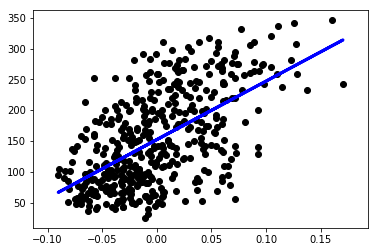

In [60]:

df2 = d.data[:, np.newaxis, 2]
t = d.target
m = linear_model.LinearRegression()
m.fit(df2, t)
y = m.predict(df2)
plt.scatter(df2, t,  color='black')
plt.plot(df2, y, color='blue', linewidth=3)